<a href="https://colab.research.google.com/github/rosepcaldas/Floresta_Aleatoria/blob/main/FlorestaAleatoria_seguradora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FLORESTA ALEATÓRIA


## IMPORTAR BIBLIOTECAS

In [ ]:
# Biblioteca para modelagem de dados
import pandas as pd 

# Biblioteca para recusrsos matemáticos
import numpy as np

# Biblioteca de plotagem/ visualização de dados (Graficos)
import seaborn as sns
import matplotlib.pyplot as plt

# Biblioteca/ Função para ignorar avisos/ alertas
from warnings import filterwarnings

In [ ]:
# Plan 1 = Base de dados (dados para treinamento)
# Plan 2 = Novas entradas (previsão dos novos seguros)
Base_Dados = pd.read_excel('BaseDados.xlsx','Plan1')

# Análise exploratória dos dados

In [ ]:
# Visualizando base de dados
#
# 1 = Não usou
# 2 = Serviço
# 3 = Furto
Base_Dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
# Visualizando algumas estatísticas básicas da base de dados  
Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


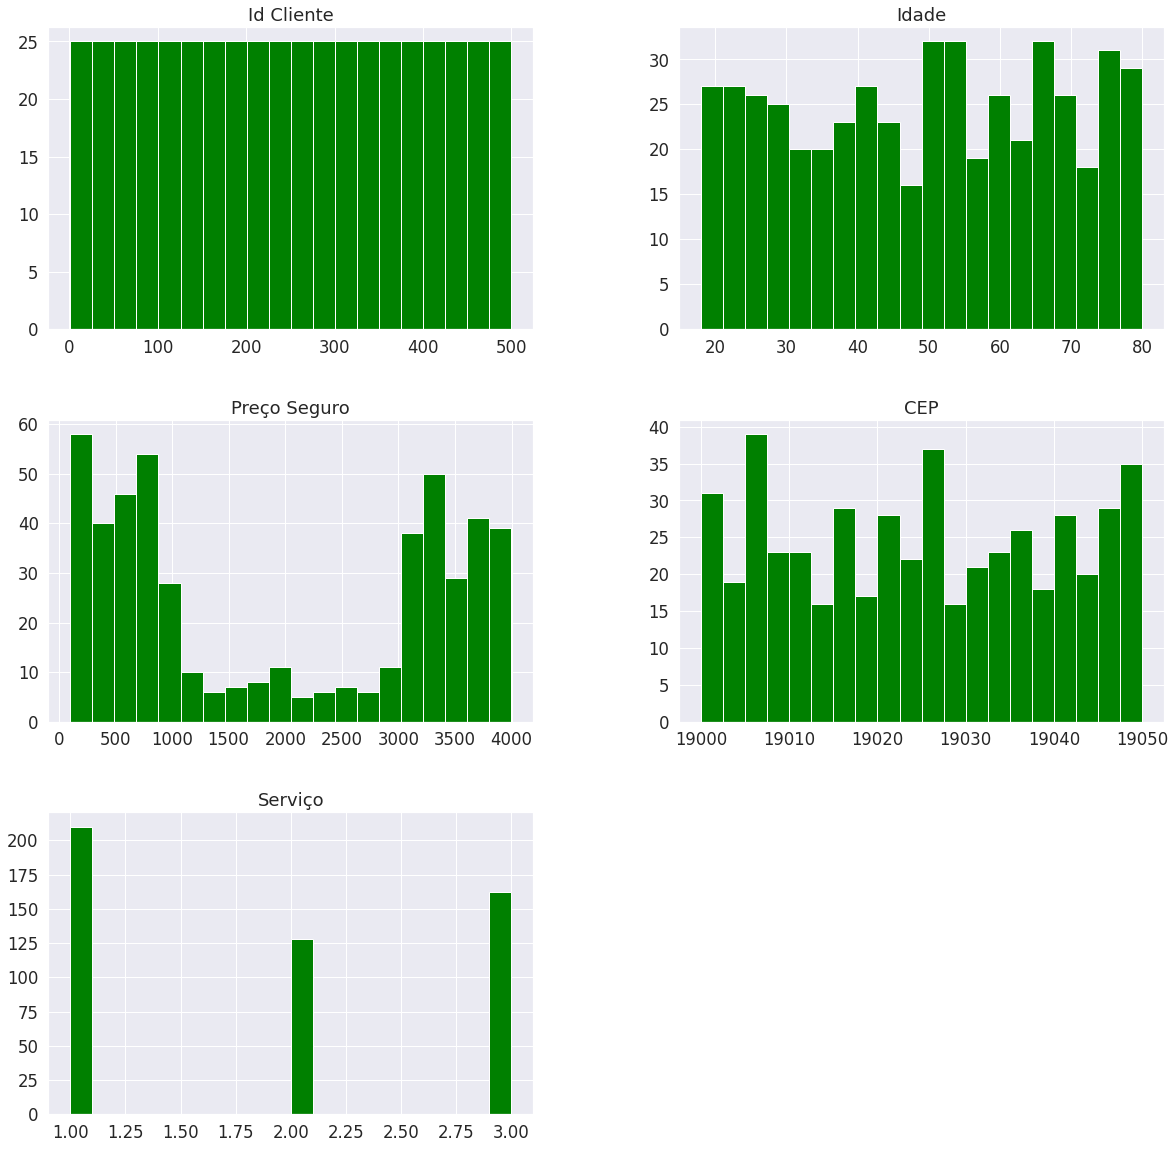

In [ ]:
# Geração de diversos histogramas
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = Base_Dados.hist(bins=20, color='green')

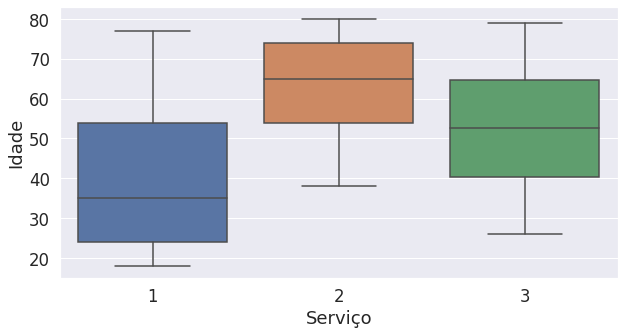

In [ ]:
# Procurando padrões dentro do conjunto de dados

plt.figure(figsize=(10,5))
sns.boxplot( data=Base_Dados, x='Serviço', y='Idade');

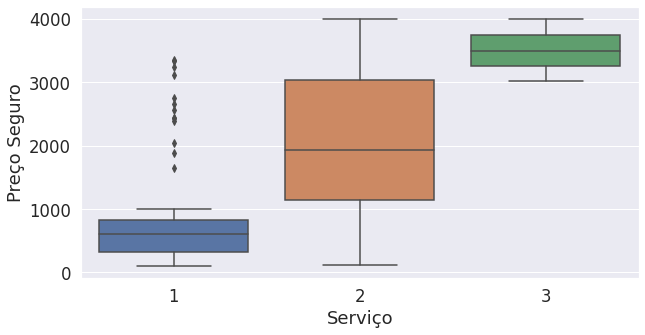

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot( data=Base_Dados, x='Serviço', y='Preço Seguro');

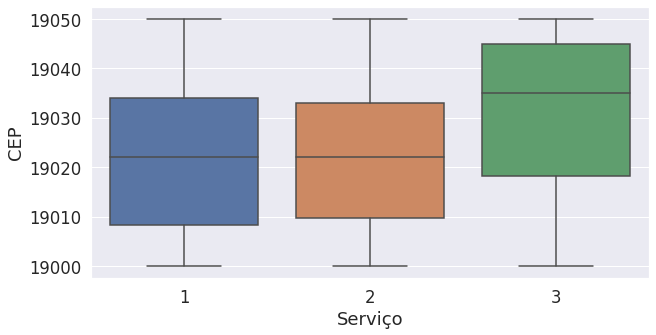

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot( data=Base_Dados, x='Serviço', y='CEP');

# Dividindo os dados de treino e teste

In [ ]:
# iloc é comando do pandas para fazer a divisão da base de dados .iloc[linhas:colunas]
# .values transforma em arrays (melhora a performace trabalhar neste formato)
Caracteristicas = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5].values # selecionando somente a coluna de serviço para 

In [ ]:
# train_test_split divide os dados entre teste e treino
# test_size=0.30 => o modelo é dividido considerando 70% para treinament
# e 30% para teste
# random_state é o inicializador do número aleatório 
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.30,
    random_state=10
)
print(len(Base_Dados))
print(len(x_treinamento))
print(len(x_teste))

500
350
150


Base de dados tem 500 linhas
Base de treinamento tem 350 linhas
Base de teste 150 linhas

#Criando o modelo de Machine Learning

In [ ]:
# importando a biblioteca da Floresta aleatória
from sklearn.ensemble import RandomForestClassifier

# Atribuindo à variável Algoritmo_floresta_aleatoria e passamos o parâmetro
# n_estimator que é o número de árvores que o algoritmo vai criar para rodar o
# teste (por padrão é 100).
Algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators=500)

# .fit inicializa o treinamento do modelo
Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(n_estimators=500)

# Avaliando a Matriz de Confusão

[[60  3  1]
 [ 6 22  8]
 [ 1  1 48]]


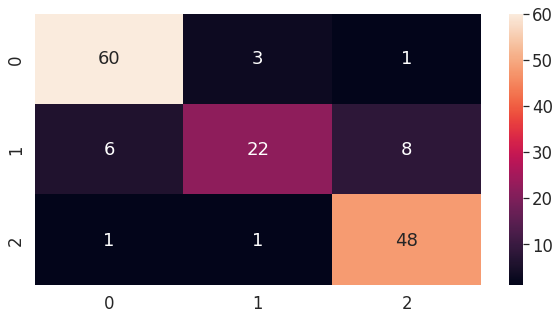

In [ ]:
Previsoes = Algoritmo_floresta_aleatoria.predict(x_teste)
from sklearn.metrics import confusion_matrix
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)
print(Matriz_Confusao)
plt.figure(figsize=(10,5))
sns.heatmap(Matriz_Confusao, annot=True)

No eixo y 0 é quem não usou o seguro, 1 quem usou serviço, 2 é se ocorreu um furto.

Olhando o gráfico a primeira linha:
 0 e foi classificado como 0 = 61% classificação correta
 0 classificado como 1 e 2 = 1% +2% classificação errada

 Observamos a matriz na diagonal para verificar a acertividade

 Essa matriz é importante para verificar se o modelo está conseguindo classificar todas as variáveis. Obeservamos uma dispersão na classificação do reparo (segunda linha)




In [ ]:
# Verificando os % de acertividade do modelo

from sklearn.metrics import classification_report

report = classification_report(y_teste, Previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.96      0.90        50

    accuracy                           0.87       150
   macro avg       0.86      0.84      0.84       150
weighted avg       0.87      0.87      0.86       150



De uma forma geral o modelo acerto em 88% comparando o real com as previsões

Recall, para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente: Variável 1(não usou): 95%, Variável 2 (Serviço): 61%, variável 3(Furto): 98%

Precision, para todas as instâncias classificadas como positivas, qual porcentagem estava correta. Para o cliente que não vai acionar o seguro o modelo tem uma precisão de 91%, usar o serviço precisão de 88% e furto 84% 

# Fazendo Previsões
Quais clientes vão acionar a seguradora futuramente

In [ ]:
# Lendo a base de dados de novas vendas
Novas_vendas = pd.read_excel('BaseDados.xlsx','Plan2')
Novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [ ]:
Novas_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    21 non-null     int64
 1   Idade         21 non-null     int64
 2   Preço Seguro  21 non-null     int64
 3   CEP           21 non-null     int64
dtypes: int64(4)
memory usage: 800.0 bytes


In [ ]:
# Vamos selecionar as caracteristicas para classificação Idade, Preço do seguro e CEP
Prever = Novas_vendas.iloc[:,1:4].values

#Crinado uma coluna nova e aplicando o modelo para trazer os valores previstos
Novas_vendas['Previsão do Modelo'] = Algoritmo_floresta_aleatoria.predict(Prever)

In [ ]:
# VIsualizando a tabela com a nova coluna gerada
Novas_vendas['Previsão do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsão do Modelo, dtype: int64

Das novas vendas:
15 clientes não vão acionar o seguro
5  clientes vão solicitar serviços de reparo
1  cliente acionará o seguro por furto